In [32]:
# Para trabajar con regex
# -----------------------------------------------------------------------
import re

# Para trabajar con ficheros
# -----------------------------------------------------------------------
import os


# Para trabajar con los DataFrames
# -----------------------------------------------------------------------
import pandas as pd

# Para poner barras progreso
# -----------------------------------------------------------------------
from tqdm import tqdm



# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar warings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Librerias para generar gráficas
# ----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


### Cargamos los archivos de demanda

In [33]:
ruta_demanda = r"C:\Users\Administrador\Desktop\RCM\laboratorio-modulo5-leccion01-elt-extraccion\data\demanda"

In [34]:
archivos = os.listdir(ruta_demanda)


In [35]:
df_concatenado_demanda=pd.DataFrame()
for archivo in tqdm(archivos):
    archivo_split= archivo.split(".csv")
    nombre_anio=archivo_split[0].split("_")
    comunidad = nombre_anio[0]
    # definimos la ruta para abrir cada uno de los ficheros y realizar las transformaciones
    ruta_fichero_demanda = os.path.join(ruta_demanda, archivo)
    df = pd.read_csv(ruta_fichero_demanda,index_col=0)
    df["ccaa"] = comunidad
    # concatenamos todos los archivos de demanda
    df_concatenado_demanda = pd.concat([df_concatenado_demanda,df], axis=0)


100%|██████████| 57/57 [00:00<00:00, 208.58it/s]


### Cargamos los archivos de generacion electrica

In [36]:
ruta_generacion = r"C:\Users\Administrador\Desktop\RCM\laboratorio-modulo5-leccion01-elt-extraccion\data\generacion"

In [37]:
archivos = os.listdir(ruta_generacion)


In [38]:
df_concatenado_generacion=pd.DataFrame()
for archivo in tqdm(archivos):
    archivo_split= archivo.split(".csv")
    nombre_anio=archivo_split[0].split("_")
    comunidad = nombre_anio[0]
    # definimos la ruta para abrir cada uno de los ficheros y realizar las transformaciones
    ruta_fichero_generacion = os.path.join(ruta_generacion, archivo)
    df = pd.read_csv(ruta_fichero_generacion, index_col=0)
    df["ccaa"] = comunidad
    df_concatenado_generacion = pd.concat([df_concatenado_generacion,df], axis=0)
          

100%|██████████| 54/54 [00:00<00:00, 295.87it/s]


In [39]:
df_concatenado_demanda.head()

,value,percentage,datetime,cod_ccaa,ccaa
0,3668893.328,1,2019-01-01T00:00:00.000+01:00,4,Andalucía
1,3152278.091,1,2019-02-01T00:00:00.000+01:00,4,Andalucía
2,3216356.360,1,2019-03-01T00:00:00.000+01:00,4,Andalucía
3,3029639.973,1,2019-04-01T00:00:00.000+02:00,4,Andalucía
4,3154123.467,1,2019-05-01T00:00:00.000+02:00,4,Andalucía


In [40]:
df_concatenado_demanda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       684 non-null    float64
 1   percentage  684 non-null    int64  
 2   datetime    684 non-null    object 
 3   cod_ccaa    684 non-null    int64  
 4   ccaa        684 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.1+ KB


In [41]:
df_concatenado_generacion.head()

,value,percentage,datetime,type,cod_ccaa,ccaa
0,25288.605,0.029517,2019-01-01T00:00:00.000+01:00,Hidráulica,4,Andalucía
1,33933.350,0.030779,2019-02-01T00:00:00.000+01:00,Hidráulica,4,Andalucía
2,35913.000,0.029645,2019-03-01T00:00:00.000+01:00,Hidráulica,4,Andalucía
3,44050.848,0.041340,2019-04-01T00:00:00.000+02:00,Hidráulica,4,Andalucía
4,88535.452,0.068497,2019-05-01T00:00:00.000+02:00,Hidráulica,4,Andalucía


In [42]:
df_concatenado_generacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 0 to 11
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       3557 non-null   float64
 1   percentage  3557 non-null   float64
 2   datetime    3557 non-null   object 
 3   type        3557 non-null   object 
 4   cod_ccaa    3557 non-null   int64  
 5   ccaa        3557 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 194.5+ KB


### Cargamos los archivos demográficos y economicos del INE

In [43]:
ruta_origen = r"C:\Users\Administrador\Desktop\RCM\laboratorio-modulo5-leccion01-elt-extraccion\data\ine"

In [44]:
archivos = os.listdir(ruta_origen)

In [45]:
archivos

['03001.csv', '67284.csv']

In [46]:
# Archivos demograficos del INE
for archivo in tqdm(archivos):
    # seleccionamos solo los archivos demograficos
    if "03001" in archivo:
        ruta_fichero_demografico = os.path.join(ruta_origen, archivo)
        df_datos_demograficos = pd.read_csv(ruta_fichero_demografico, encoding= 'latin-1', sep=';')
        
        

100%|██████████| 2/2 [00:00<00:00, 74.29it/s]


In [47]:
# Archivos economicos del INE
for archivo in tqdm(archivos):
    # seleccionamos solo los archivos demograficos
    if "67284" in archivo:
        ruta_fichero_economico = os.path.join(ruta_origen, archivo)
        df_datos_economicos = pd.read_csv(ruta_fichero_economico,encoding= 'latin-1',sep=';')


100%|██████████| 2/2 [00:00<00:00, 154.23it/s]


### Limpieza de datos

Empezamos con los dataframes de demanda y generación

En el DataFrame de la demanda vamos a poner la fecha en el formato correcto

In [48]:
df_concatenado_demanda["datetime"]=pd.to_datetime(df_concatenado_demanda["datetime"], utc=True).dt.tz_localize(None).dt.year

In [49]:
# Vamos a ver si tenemos nulos y a hacernos una idea de los tipos de datos que tenemos
df_concatenado_demanda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       684 non-null    float64
 1   percentage  684 non-null    int64  
 2   datetime    684 non-null    int32  
 3   cod_ccaa    684 non-null    int64  
 4   ccaa        684 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 29.4+ KB


Normalizamos la fecha también en el dataFrame de generación

In [50]:
df_concatenado_generacion["datetime"]=pd.to_datetime(df_concatenado_generacion["datetime"], utc=True).dt.tz_localize(None).dt.year

In [51]:
df_concatenado_generacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 0 to 11
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       3557 non-null   float64
 1   percentage  3557 non-null   float64
 2   datetime    3557 non-null   int32  
 3   type        3557 non-null   object 
 4   cod_ccaa    3557 non-null   int64  
 5   ccaa        3557 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 180.6+ KB


El value está en MWh

Las columnas están estandarizadas y sin nulos, y el diccionario de las comunidades situado en el archivo de soporte tiene los nombres de las comunidades bien puestos. Pasamos a la busqueda de outliers.

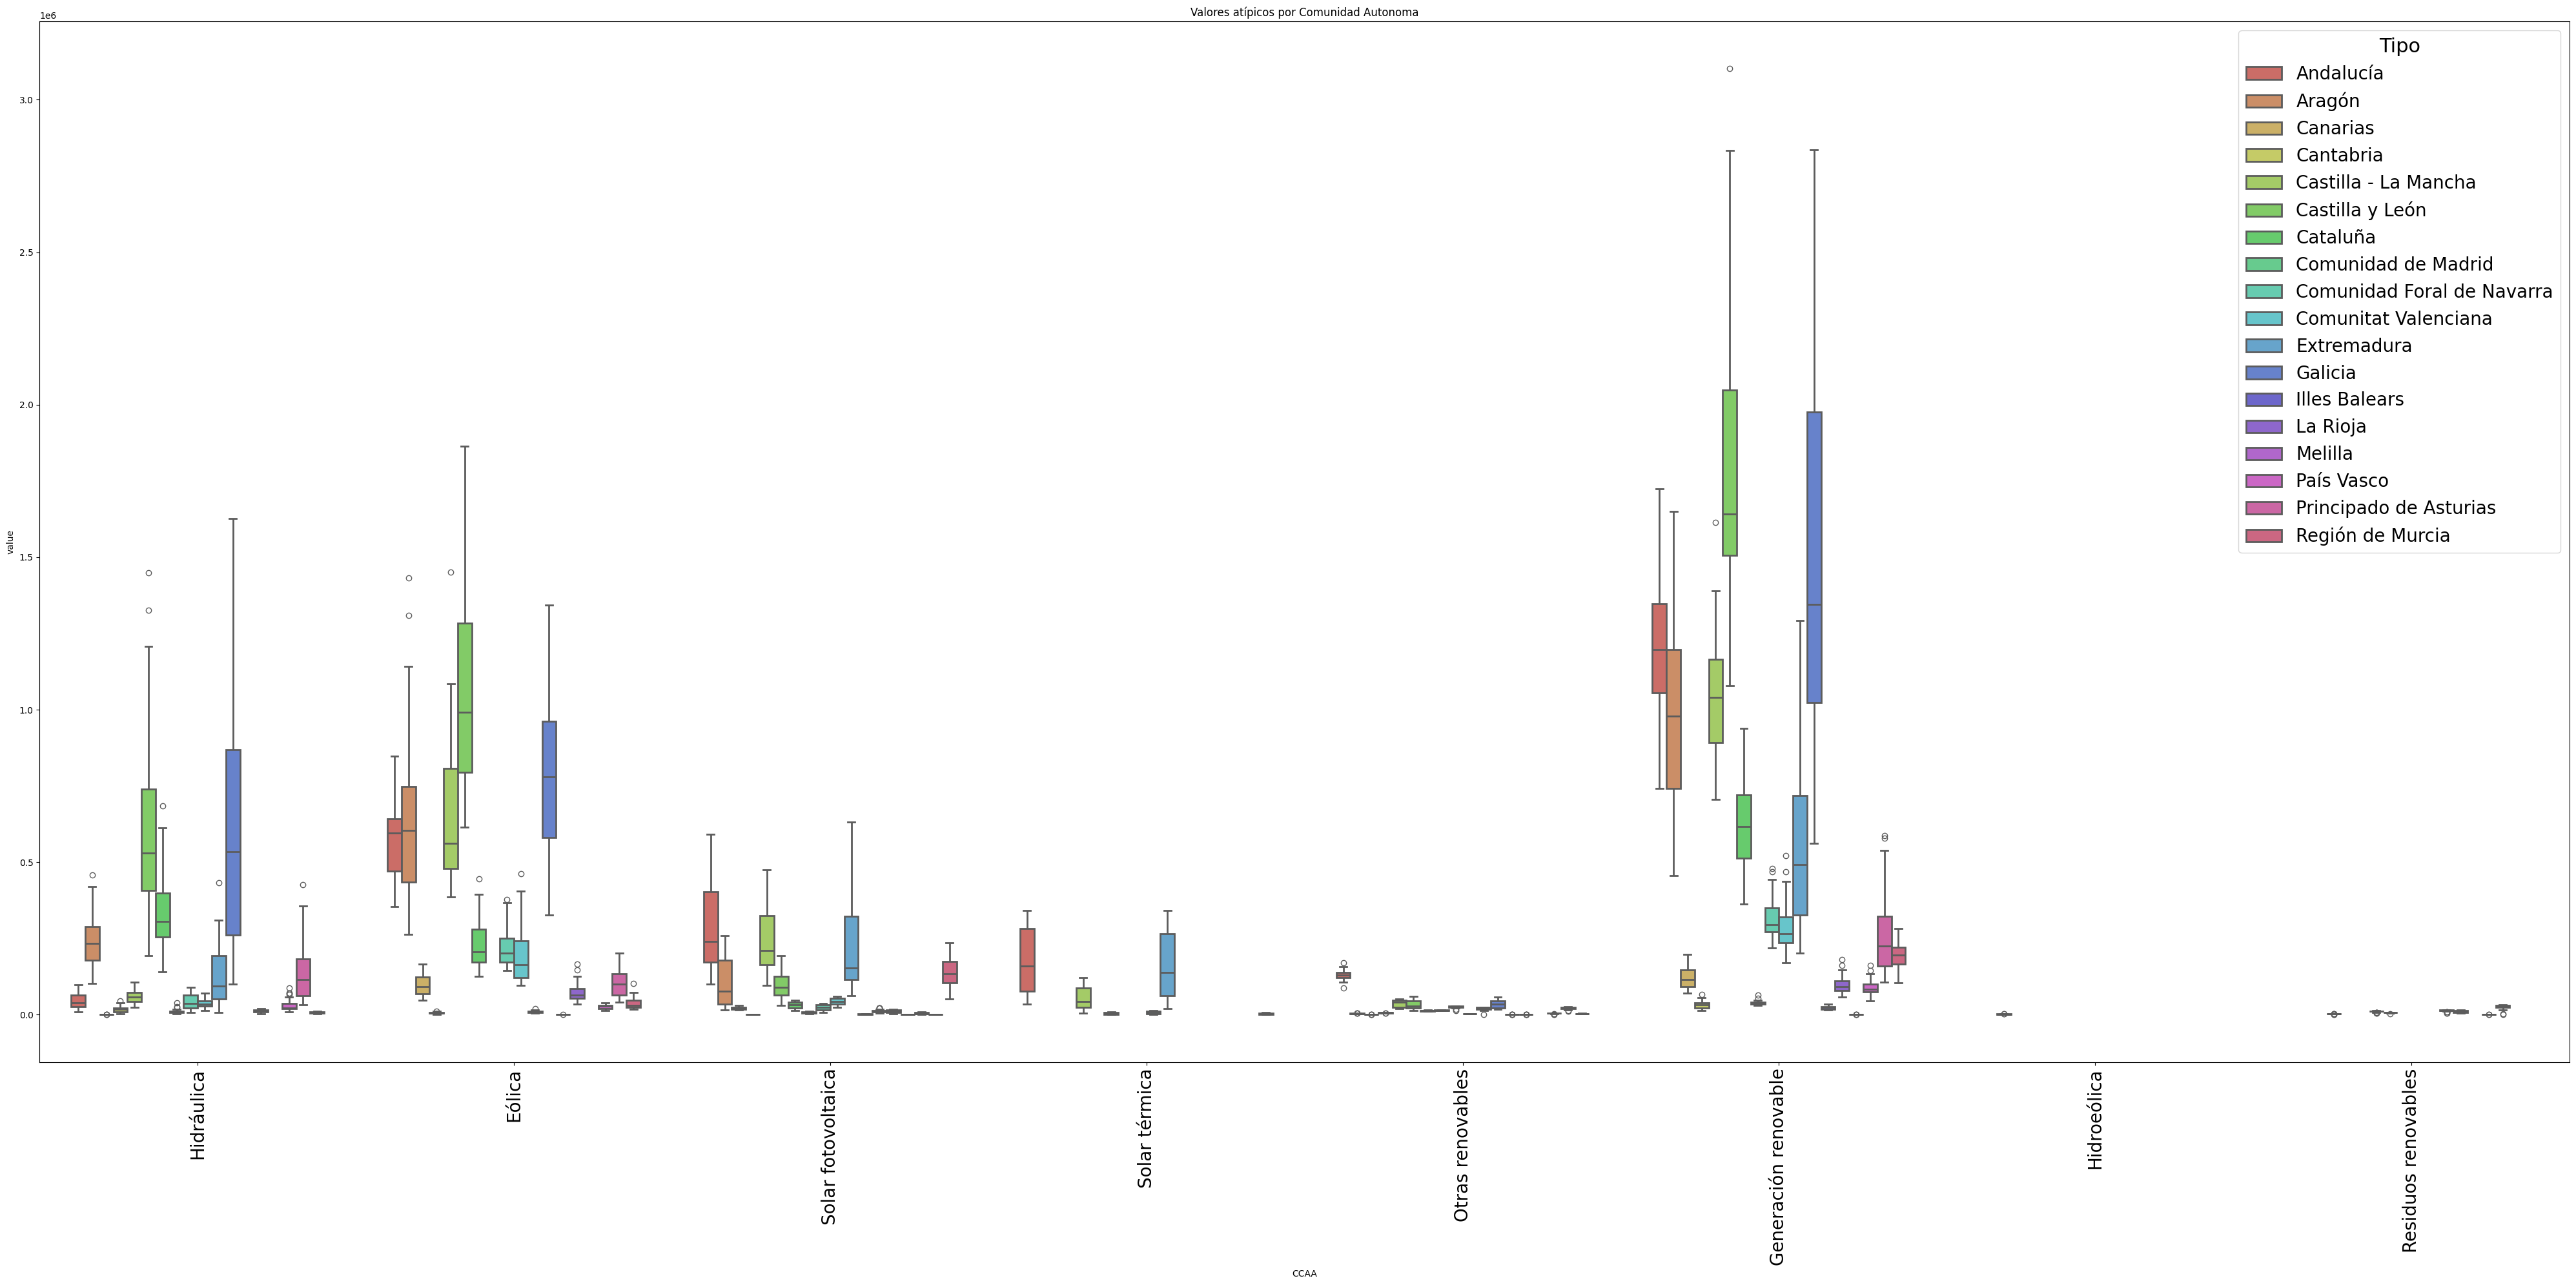

In [52]:
plt.figure(figsize=(40,20))
sns.boxplot(x="type" , y= "value", hue= "ccaa", data= df_concatenado_generacion, linewidth=2, palette="hls")
plt.title("Valores atípicos por Comunidad Autonoma")
plt.xlabel("CCAA")
plt.xticks(rotation=90, fontsize=20)
plt.legend(title="Tipo", fontsize=20, title_fontsize=22)
plt.tight_layout(); 

Destacan claramente los valores en Generación Renovable, especialmente en las comunidades de Cataluña y Galicia

In [53]:
df_generacion_renovable = df_concatenado_generacion[df_concatenado_generacion["type"] == "Generación renovable"]
df_generacion_renovable.head()


,value,percentage,datetime,type,cod_ccaa,ccaa
0,856751.435,1.0,2018,Generación renovable,4,Andalucía
1,1102486.102,1.0,2019,Generación renovable,4,Andalucía
2,1211454.172,1.0,2019,Generación renovable,4,Andalucía
3,1065583.184,1.0,2019,Generación renovable,4,Andalucía
4,1292548.099,1.0,2019,Generación renovable,4,Andalucía


Observamos que "Generación Renovable" tiene asignado el 100 por 100 del porcentaje lo que tiene que ser un error, puesto que estos datos pueden desvirtuar el analisis, los eliminamos

In [54]:
df_concatenado_generacion=df_concatenado_generacion[df_concatenado_generacion["type"]!= "Generación renovable"].reset_index(drop=True)


In [55]:
df_concatenado_generacion["type"].unique()


array(['Hidráulica', 'Eólica', 'Solar fotovoltaica', 'Solar térmica',
       'Otras renovables', 'Hidroeólica', 'Residuos renovables'],
      dtype=object)

Pasamos a los dataFrame de datos del INE

In [56]:
df_datos_economicos.sample(5)

,Provincias,Ramas de actividad,periodo,Total
1346,40 Segovia,Valor añadido bruto total,2019,3.175.076
634,20 Gipuzkoa,"B_E. Industrias extractivas, industria manufac...",2020,5.176.787
311,48 Bizkaia,F. Construcción,2019,2.775.398
1266,37 Salamanca,F. Construcción,2021(P),410.569
291,08 Barcelona,Impuestos netos sobre los productos,2021(P),16.548.982


In [57]:
df_datos_economicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Provincias          1716 non-null   object
 1   Ramas de actividad  1716 non-null   object
 2   periodo             1716 non-null   object
 3   Total               1716 non-null   object
dtypes: object(4)
memory usage: 53.8+ KB


In [58]:
df_datos_economicos["periodo"]=df_datos_economicos["periodo"].str.replace("(P)", "").astype(int)

Con esto terminamos con los datos economicos y pasamos a los demográficos.

In [59]:
df_datos_demograficos

,Provincias,Edad (3 grupos de edad),Españoles/Extranjeros,Sexo,Año,Total
0,TOTAL ESPAÑA,TOTAL EDADES,TOTAL,Ambos sexos,2021,47.385.107
1,TOTAL ESPAÑA,TOTAL EDADES,TOTAL,Ambos sexos,2020,47.450.795
2,TOTAL ESPAÑA,TOTAL EDADES,TOTAL,Ambos sexos,2019,47.026.208
3,TOTAL ESPAÑA,TOTAL EDADES,TOTAL,Hombres,2021,23.222.953
4,TOTAL ESPAÑA,TOTAL EDADES,TOTAL,Hombres,2020,23.255.590
...,...,...,...,...,...,...
7627,52 Melilla,65 y más,% Extranjeros,Hombres,2020,"10,86"
7628,52 Melilla,65 y más,% Extranjeros,Hombres,2019,"10,73"
7629,52 Melilla,65 y más,% Extranjeros,Mujeres,2021,"9,55"
7630,52 Melilla,65 y más,% Extranjeros,Mujeres,2020,"9,55"


In [60]:
df_datos_demograficos=df_datos_demograficos[df_datos_demograficos["Provincias"]!= "TOTAL ESPAÑA"].reset_index(drop=True)
df_datos_demograficos=df_datos_demograficos[df_datos_demograficos["Edad (3 grupos de edad)"]!= "TOTAL EDADES"].reset_index(drop=True)
df_datos_demograficos=df_datos_demograficos[df_datos_demograficos["Españoles/Extranjeros"]!= "TOTAL"].reset_index(drop=True)
df_datos_demograficos=df_datos_demograficos[df_datos_demograficos["Sexo"]!= "Ambos sexos"].reset_index(drop=True)
df_datos_demograficos=df_datos_demograficos[df_datos_demograficos["Españoles/Extranjeros"]!= f"% Extranjeros"].reset_index(drop=True)

In [61]:
df_datos_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provincias               1872 non-null   object
 1   Edad (3 grupos de edad)  1872 non-null   object
 2   Españoles/Extranjeros    1872 non-null   object
 3   Sexo                     1872 non-null   object
 4   Año                      1872 non-null   int64 
 5   Total                    1872 non-null   object
dtypes: int64(1), object(5)
memory usage: 87.9+ KB


En principio hemos terinado con la limpieza de datos. Guardamos los archivos.

In [ ]:
df_datos_economicos.to_csv("../data/datos_agregados/datos_economicos_agregados.csv")
df_datos_demograficos.to_csv("../data/datos_agregados/datos_poblacionaels_agregados.csv")
df_concatenado_demanda.to_csv("../data/datos_agregados/datos_demanda_agregados.csv")
df_concatenado_generacion.to_csv("../data/datos_agregados/datos_generacion_agregados.csv")